# 决策树实践——利用sklearn实现

## 导入sklearn包

In [65]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn import tree

## 创建数据集

In [66]:
attr_arr = [['青年', '否', '否', '一般', 'no'],
            ['青年', '否', '否', '好', 'no'],
            ['青年', '是', '否', '好', 'yes'],
            ['青年', '是', '是', '一般', 'yes'],
            ['青年', '否', '否', '一般', 'no'],
            ['中年','否', '否', '一般', 'no'],
            ['中年', '否', '否', '好', 'no'],
            ['中年', '是', '是', '好', 'yes'],
            ['中年', '否', '是', '非常好', 'yes'],
            ['中年', '否', '是', '非常好', 'yes'],
            ['老年', '否', '是', '非常好', 'yes'],
            ['老年', '否', '是', '好', 'yes'],
            ['老年', '是', '否', '好', 'yes'],
            ['老年', '是', '否', '非常好', 'yes'],
            ['老年', '否', '否', '一般', 'no']]

In [67]:
dataMat=np.mat(attr_arr)

In [68]:
arrMat = dataMat[:,0:4]
resultMat = dataMat[:,4]

In [69]:
#特征属性的名称
attr_names = ['age', 'work', 'house', 'loan']
#每行为一个对象，每列为一种属性，最后一个为结果值
attr_pd = pd.DataFrame(data=arrMat,columns=attr_names)
print(attr_pd)

   age work house loan
0   青年    否     否   一般
1   青年    否     否    好
2   青年    是     否    好
3   青年    是     是   一般
4   青年    否     否   一般
5   中年    否     否   一般
6   中年    否     否    好
7   中年    是     是    好
8   中年    否     是  非常好
9   中年    否     是  非常好
10  老年    否     是  非常好
11  老年    否     是    好
12  老年    是     否    好
13  老年    是     否  非常好
14  老年    否     否   一般


In [71]:
#将数据集中的字符串转化为代表类别的数字。因为sklearn的决策树只识别数字
#sklearn也提供了序列化工具 – sklearn.preprocessing.LabelEncoder
le = LabelEncoder()
for col in attr_pd.columns:    #为每一列序列化,就是将每种字符串转化为对应的数字。用数字代表类别
    attr_pd[col] = le.fit_transform(attr_pd[col])
print(attr_pd)

    age  work  house  loan
0     2     0      0     0
1     2     0      0     1
2     2     1      0     1
3     2     1      1     0
4     2     0      0     0
5     0     0      0     0
6     0     0      0     1
7     0     1      1     1
8     0     0      1     2
9     0     0      1     2
10    1     0      1     2
11    1     0      1     1
12    1     1      0     1
13    1     1      0     2
14    1     0      0     0


## 模型创建

skearn中使用skearn.tree.DecisionTreeClassifier来实现决策树分类算法。参数如下：
* criterion-特征选择标准：'gini' or 'entropy'(default='gini')，一般选择默认即可，对准确率并无影响，信息熵效率低一点。
* splitter-特征划分标准：'best' or 'random'(default='best')，'best'在特征的所有划分点中找出最优的划分点，'random'是随机的在部分划分点中找局部最优的划分点，默认"best"适合样本量不大的时候，而样本数据量非常大，推荐用'random'。
* max_depth-决策树的最大深度：int or None,optional（default=None）,一般而言，数据少或者特征少的时候可以不管这个值，样本多特征多，推荐限制这个深度，常用10-100之间，用来解决过拟合。
* min_impurity_decrease-节点划分最小不纯度：float,optional(default=0.)这个值限制了决策树的增长，如果某个节点的不纯度（基尼系数/信息增益/均方差/绝对值）小于这个阈值，则该节点不再生成子节点。
* min_samples_split-内部节点再划分所需最小样本数：int，float,optional(default=2),如果是int，则传入值本身作为最小样本数；如果是float，则去ceil(min_samples_spit*样本数量)的值作为最小样本数，即向上取整。
* min_samples_leaf-叶子节点最少样本数：如果是int，则取传入值本身作为最小样本数； 如果是 float，则去 ceil(min_samples_leaf * 样本数量) 的值作为最小样本数，即向上取整。 这个值限制了叶子节点最少的样本数，如果某叶子节点数目小于样本数，则会和兄弟节点一起被剪枝。
* max_leaf_nodes-最大叶子节点数：int or None, optional (default=None) 通过限制最大叶子节点数，可以防止过拟合，默认是”None”，即不限制最大的叶子节点数。如果加了限制，算法会建立在最大叶子节点数内最优的决策树。如果特征不多，可以不考虑这个值，但是如果特征分成多的话，可以加以限制，具体的值可以通过交叉验证得到。
* min_impurity_split-信息增益的阀值:决策树在创建分支时，信息增益必须大于这个阀值，否则不分裂。
* min_weight_fraction_leaf-叶子节点最小的样本权重和:float, optional (default=0.) 这个值限制了叶子节点所有样本权重和的最小值，如果小于这个值，则会和兄弟节点一起被剪枝。 默认是0，就是不考虑权重问题。一般来说，如果有较多样本有缺失值，或者分类树样本的分布类别偏差很大，就会引入样本权重，这时就要注意这个值了。
* class_weight-类别权重：dict, list of dicts, “balanced” or None, default=None，指定样本各类别的的权重，主要是为了防止训练集某些类别的样本过多，导致训练的决策树过于偏向这些类别。这里可以指定各个样本的权重，或者用“balanced”，如果使用“balanced”，则算法会自己计算权重，样本量少的类别所对应的样本权重会高。当然，如果样本类别分布没有明显的偏倚，则可以不管这个参数，选择默认的”None” 不适用于回归树sklearn.tree.DecisionTreeRegressor。

In [72]:
# 构建决策树
clf = tree.DecisionTreeClassifier()
clf.fit(attr_pd, resultMat)
print(clf)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


模型调参注意事项：
* 当样本少数量但是样本特征非常多的时候，决策树很容易过拟合，一般来说，样本数比特征数多一些会比较容易建立健壮的模型。
* 如果样本数量少但是样本特征非常多，在拟合决策树模型前，推荐先做维度规约，比如主成分分析（PCA），特征选择（Losso）或者独立成分分析（ICA）。这样特征的维度会大大减小。再来拟合决策树模型效果会好。
* 推荐多用决策树的可视化，同时先限制决策树的深度（比如最多3层），这样可以先观察下生成的决策树里数据的初步拟合情况，然后再决定是否要增加深度。
* 在训练模型先，注意观察样本的类别情况（主要指分类树），如果类别分布非常不均匀，就要考虑用类别权重(class_weight)来限制模型过于偏向样本多的类别。
* 决策树的数组使用的是numpy的float32类型，如果训练数据不是这样的格式，算法会先做copy再运行。
* 如果输入的样本矩阵是稀疏的，推荐在拟合前调用csc_matrix稀疏化，在预测前调用csr_matrix稀疏化。


## 预测

In [73]:
# 使用决策树进行预测
result = clf.predict([[1,1,1,0]])    # 输入也必须是数字的。分别代表了每个数字所代表的属性的字符串值
print(result)

['yes']


## 可视化

sklearn构建的模型可以用pydotplus库和graphviz绘制pdf图

In [74]:
# 将决策树保存成图片，利用pydotplus生成pdf
from sklearn.externals.six import StringIO
import pydotplus

dot_data = StringIO()
target_name=['no','yes']
tree.export_graphviz(clf, out_file=dot_data,feature_names=attr_names,
                     class_names=target_name,filled=True,rounded=True,
                     special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('loantree.png')

True

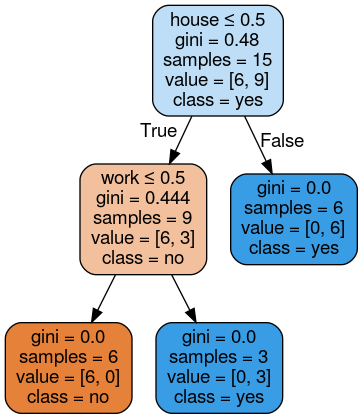

In [75]:
#也利用ipython的Image直接产生图在notebook中
from IPython.display import Image  
Image(graph.create_png()) 

## 示例：预测泰坦尼克号幸存者

### 探索数据

In [76]:
import pandas as pd
import numpy as np

In [77]:
def read_dataset(fname):
    data = pd.read_csv(fname,index_col=0)
    return data

In [122]:
data = read_dataset('data/titanic/train.csv')

In [123]:
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


### 数据预处理 
* 筛选特征值，丢掉不需要的特征
* 对性别进行二值化（转成0和1）
* 港口转换成数值型数据
* 处理缺失值（如年龄等）

In [124]:
#处理无用的特征
data.drop(['Name','Ticket','Cabin'],axis=1,inplace=True)

In [125]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S
6,0,3,male,NaN,0,0,8.4583,Q
7,0,1,male,54.0,0,0,51.8625,S
8,0,3,male,2.0,3,1,21.0750,S
9,1,3,female,27.0,0,2,11.1333,S


In [126]:
#处理性别数据
lables = data['Sex'].unique().tolist()

In [127]:
data['Sex']=[*map(lambda x:lables.index(x),data['Sex'])]

In [128]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,0,22.0,1,0,7.2500,S
2,1,1,1,38.0,1,0,71.2833,C
3,1,3,1,26.0,0,0,7.9250,S
4,1,1,1,35.0,1,0,53.1000,S
5,0,3,0,35.0,0,0,8.0500,S
6,0,3,0,NaN,0,0,8.4583,Q
7,0,1,0,54.0,0,0,51.8625,S
8,0,3,0,2.0,3,1,21.0750,S
9,1,3,1,27.0,0,2,11.1333,S


In [129]:
#处理等船港口数据
lables = data['Embarked'].unique().tolist()

In [130]:
lables

['S', 'C', 'Q', nan]

In [131]:
data['Embarked']=data['Embarked'].apply(lambda n:lables.index(n))

In [132]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,0,22.0,1,0,7.2500,0
2,1,1,1,38.0,1,0,71.2833,1
3,1,3,1,26.0,0,0,7.9250,0
4,1,1,1,35.0,1,0,53.1000,0
5,0,3,0,35.0,0,0,8.0500,0
6,0,3,0,NaN,0,0,8.4583,2
7,0,1,0,54.0,0,0,51.8625,0
8,0,3,0,2.0,3,1,21.0750,0
9,1,3,1,27.0,0,2,11.1333,0


In [133]:
#处理缺失数据，填0
data = data.fillna(0)

In [134]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,0,22.0,1,0,7.2500,0
2,1,1,1,38.0,1,0,71.2833,1
3,1,3,1,26.0,0,0,7.9250,0
4,1,1,1,35.0,1,0,53.1000,0
5,0,3,0,35.0,0,0,8.0500,0
6,0,3,0,0.0,0,0,8.4583,2
7,0,1,0,54.0,0,0,51.8625,0
8,0,3,0,2.0,3,1,21.0750,0
9,1,3,1,27.0,0,2,11.1333,0


### 拆分数据集
把survived列提取出来作为标签，然后从数据集中将其丢弃。同时拆分成训练集和测试集

In [135]:
from sklearn.model_selection import train_test_split

In [136]:
y = data['Survived'].values
X = data.drop(['Survived'],axis=1).values

In [137]:
print(y[0:3])
print(X[0:3,:])

[0 1 1]
[[ 3.      0.     22.      1.      0.      7.25    0.    ]
 [ 1.      1.     38.      1.      0.     71.2833  1.    ]
 [ 3.      1.     26.      0.      0.      7.925   0.    ]]


In [138]:
X_train, X_test, y_train, y_test= train_test_split(X, y,\
                                test_size=0.2)

In [139]:
print('X_train_shape=', X_train.shape,
      ' y_train_shape=', y_train.shape)

X_train_shape= (712, 7)  y_train_shape= (712,)


In [140]:
print('X_test_shape=',X_test.shape,
     ' y_train_shape=',y_test.shape)

X_test_shape= (179, 7)  y_train_shape= (179,)


### 模型训练

In [141]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
print('train score=', clf.score(X_train,y_train))
print('test score=', clf.score(X_test, y_test))

train score= 0.9845505617977528
test score= 0.7486033519553073


分析：训练集精度很高，而测试集精度不高，这是什么现象？————过拟合。  
解决办法：剪枝

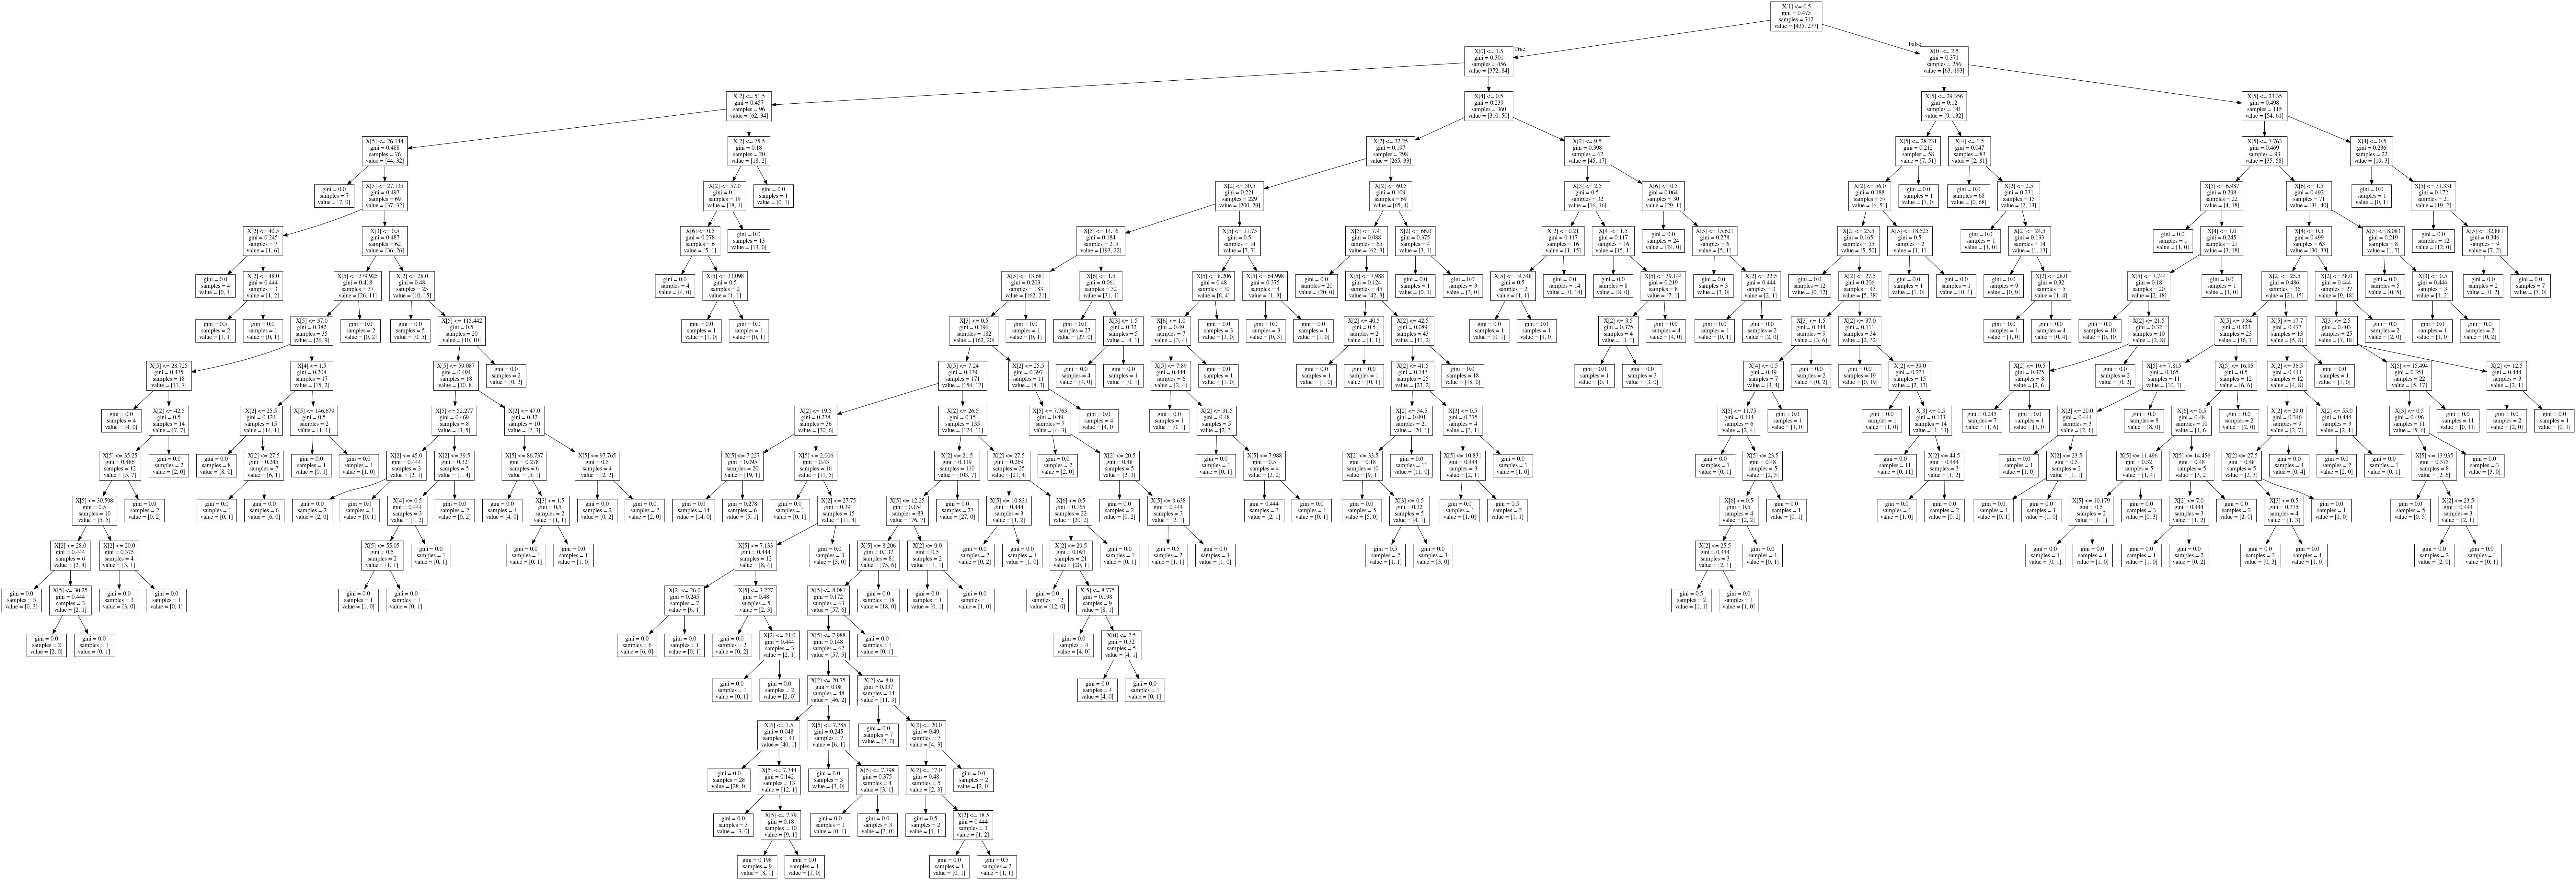

In [143]:
from IPython.display import Image  
dot_data = tree.export_graphviz(clf, out_file=None)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

### 优化模型参数

1. 通过max_depth参数来优化模型  
利用max_depth参数限定决策树的深度，在一定程度上避免过拟合


In [144]:
def cv_score(d):
    clf = DecisionTreeClassifier(max_depth = d)
    clf.fit(X_train, y_train)
    return (clf.score(X_train, y_train), clf.score(X_test, y_test))

In [145]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
depths = np.arange(1, 10)
scores = [cv_score(d) for d in depths]
train_scores = [s[0] for s in scores]
test_scores = [s[1] for s in scores]

#找到交叉验证数据集精度最高的索引
train_best_index = np.argmax(train_scores)
test_best_index = np.argmax(test_scores)

print('best depth=',test_best_index + 1, ' best depth scores=', 
      test_scores[test_best_index],'\n')

best depth= 6  best depth scores= 0.8491620111731844 



train_test_split方法对数据切分是随机的，每次用不同的数据集训练模型时候得到不同的最佳深度，可以写一个循环反复测试，最后验证最佳的分支深度。

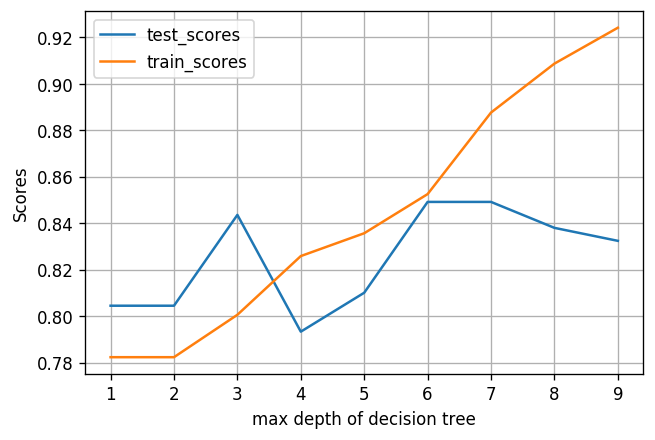

In [146]:
from matplotlib import pyplot as plt
depths = np.arange(1,10)
plt.figure(figsize=(6,4), dpi=120)
plt.grid()
plt.xlabel('max depth of decision tree')
plt.ylabel('Scores')
plt.plot(depths, test_scores, label = 'test_scores')
plt.plot(depths, train_scores, label = 'train_scores')
plt.legend()
plt.show()

2. 通过min_impurity_decrease来优化模型  
这个参数用来指定信息熵或者基尼系数的阈值，当决策树分裂后，如果信息增益低于这个阈值则不再分裂

In [147]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2)

In [148]:
def minsplit_score(val):
    clf = DecisionTreeClassifier(criterion='gini', min_impurity_decrease = val)
    clf.fit(X_train, y_train)
    return (clf.score(X_train, y_train),clf.score(X_test, y_test))

In [149]:
#指定参数的范围，分别训练模型并计算得分
vals = np.linspace(0,0.2,100)
scores = [minsplit_score(v) for v in vals]
train_scores = [s[0] for s in scores]
test_scores = [s[1] for s in scores]

best_min_index = np.argmax(test_scores)
best_score = test_scores[best_min_index]

print('best_min_index=',vals[best_min_index])
print('best_score=', best_score)

best_min_index= 0.00808080808080808
best_score= 0.8044692737430168


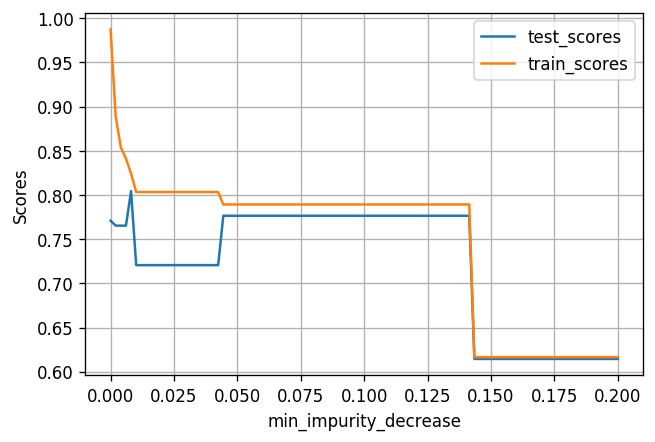

In [150]:
plt.figure(figsize=(6,4), dpi = 120)
plt.grid()
plt.xlabel('min_impurity_decrease')
plt.ylabel('Scores')
plt.plot(vals, test_scores, label = 'test_scores')
plt.plot(vals, train_scores, label = 'train_scores')
plt.legend()
plt.show()

问题：每次使用不同随机切分的数据集得到的最佳参数为0.002很接近于0，为什么？

到此找到了两个参数，最佳深度depth=5和最佳min_impurity_decrease=0.002，下面用这两个参数建立模型进行测试：

In [151]:
from sklearn import metrics

In [152]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [153]:
model = DecisionTreeClassifier(max_depth = 5, min_impurity_decrease = 0.002)
model.fit(X_train, y_train)

print('test_score=',model.score(X_test, y_test))

test_score= 0.8044692737430168


In [154]:
y_pred = model.predict(X_test)

In [155]:
print('Precision=',metrics.precision_score(y_test, y_pred))
print('Recall=', metrics.recall_score(y_test, y_pred))
print('F1-score=', metrics.f1_score(y_test, y_pred))

Precision= 0.8181818181818182
Recall= 0.5714285714285714
F1-score= 0.6728971962616823


#### 分析：  
1. 数据不稳定： 每次重新分配训练数据集，原参数就不是最优。解决办法：多次计算求平均值   
2. 不能一次选择多个参数：例如想max_depth和min_impurity两者结合起来找最优参数就难以实现  
#### 解决办法： 利用sklearn.model_selection包提供了大量的模型选择和评估的工具

### 模型参数选择工具包——利用GridSearchCV求最优参数

In [156]:
from sklearn.model_selection import GridSearchCV

In [157]:
thresholds = np.linspace(0,0.2,50)

In [158]:
param_grid = {'min_impurity_decrease':thresholds}

In [159]:
clf = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 5)

In [160]:
clf.fit(X, y)

/home/liang/miniconda3/envs/gluon/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_impurity_decrease': array([0.     , 0.00408, 0.00816, 0.01224, 0.01633, 0.02041, 0.02449,
       0.02857, 0.03265, 0.03673, 0.04082, 0.0449 , 0.04898, 0.05306,
       0.05714, 0.06122, 0.06531, 0.06939, 0.07347, 0.07755, 0.08163,
       0.08571, 0.0898 , 0.09388, 0.09796, 0.10204, 0...27, 0.16735,
       0.17143, 0.17551, 0.17959, 0.18367, 0.18776, 0.19184, 0.19592,
       0.2    ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [161]:
print('best_params:{0}\nbest_score:{1}'.format(clf.best_params_, clf.best_score_))

best_params:{'min_impurity_decrease': 0.00816326530612245}
best_score:0.8114478114478114


模型解释：  
* param_grid：字典，字典的关键字对应的值是一个列表。GridSearchCV会枚举列表里所有值来构建模型多次计算训练模型，并计算模型评分，最终得到指定参数值的平均评分及标准差
* cv:用来指定交叉验证数据集的生成规则，cv=5表示每次计算把数据集分成5份，拿其中一份作为交叉验证数据集，其它作为训练集。最终得出最优参数集最优评分保存在clf.best_params_和clf.best_score_。  
* clf.cv_results:保存了计算过程的所有中间结果。

### 画出学习曲线

In [162]:
def plot_curve(train_sizes, cv_results, xlabel):
    train_scores_mean = cv_results['mean_train_score']
    train_scores_std = cv_results['std_train_score']
    test_scores_mean = cv_results['mean_test_score']
    test_scores_std = cv_results['std_test_score']
    plt.figure(figsize=(6,4), dpi = 120)
    plt.title('parameters turning')
    plt.grid()
    plt.xlabel(xlabel)
    plt.ylabel('score')
    plt.fill_between(train_sizes,
                    train_scores_mean - train_scores_std,
                    train_scores_mean + train_scores_std,
                    alpha = 0.1, color = 'r')
    plt.fill_between(train_sizes,
                    test_scores_mean - train_scores_std,
                    test_scores_mean + test_scores_std,
                    alpha = 0.1, color = 'g')
    plt.plot(train_sizes, train_scores_mean, '.--', color = 'r',
            label = 'Training score')
    plt.plot(train_sizes, test_scores_mean, '.--', color = 'g',
            label = 'Cross-validation score')
    
    plt.legend(loc = 'best')

In [163]:
from sklearn.model_selection import GridSearchCV

thresholds = np.linspace(0, 0.2, 50)

clf = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 5)
clf.fit(X, y)
print('best param={0}\nbest score={1}'.format(clf.best_params_, clf.best_score_))

best param={'min_impurity_decrease': 0.00816326530612245}
best score=0.8114478114478114


/home/liang/miniconda3/envs/gluon/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


/home/liang/miniconda3/envs/gluon/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/liang/miniconda3/envs/gluon/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('std_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


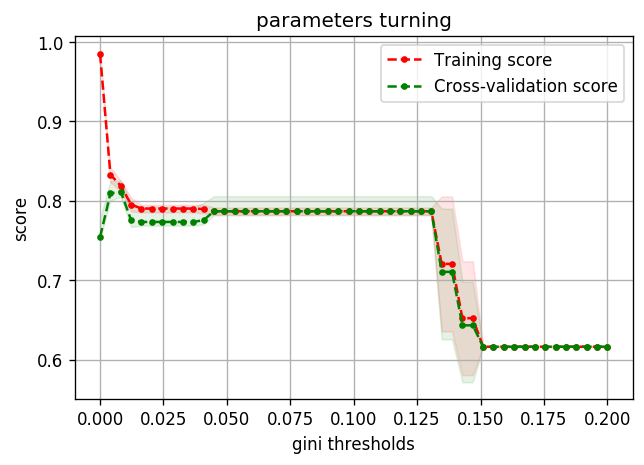

In [164]:
plot_curve(thresholds, clf.cv_results_, xlabel = 'gini thresholds')

#### 多组参数之间选择最优参数

In [165]:
from sklearn.model_selection import GridSearchCV

In [166]:
entropy_thresholds = np.linspace(0,1,100)
gini_thresholds = np.linspace(0,0.2,100)

#设置参数矩阵
param_grid = [{'criterion':['entropy'], 'min_impurity_decrease': entropy_thresholds},
             {'criterion':['gini'], 'min_impurity_decrease': gini_thresholds},
             {'max_depth':np.arange(2,10)},
             {'min_samples_split':np.arange(2,30,2)}]

In [167]:
clf = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 5)
clf.fit(X, y)
print('best param:{0}\nbest score:{1}'.format(clf.best_params_, clf.best_score_))

best param:{'min_samples_split': 22}
best score:0.813692480359147


/home/liang/miniconda3/envs/gluon/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [168]:
dict = {}
for i in np.arange(20):
    clf = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 5)
    clf.fit(X, y)
    if str(clf.best_params_) in dict:
        dict[str(clf.best_params_)] += 1
    else:
        dict[str(clf.best_params_)] = 1

/home/liang/miniconda3/envs/gluon/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/home/liang/miniconda3/envs/gluon/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/home/liang/miniconda3/envs/gluon/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/home/liang/miniconda3/envs/gluon/lib

In [169]:
dict

{"{'min_samples_split': 22}": 13,
 "{'criterion': 'gini', 'min_impurity_decrease': 0.00808080808080808}": 5,
 "{'min_samples_split': 20}": 2}

结果波动很大，做了20次测试

### 绘制决策树

In [170]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

clf = DecisionTreeClassifier(min_samples_split=22)
clf = clf.fit(X_train, y_train)
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
print('train score: {0}; test score: {1}'.format(train_score, test_score))

# 导出 titanic.dot 文件
with open("tree.dot", 'w') as f:
    f = tree.export_graphviz(clf, out_file=f)

train score: 0.875; test score: 0.7932960893854749


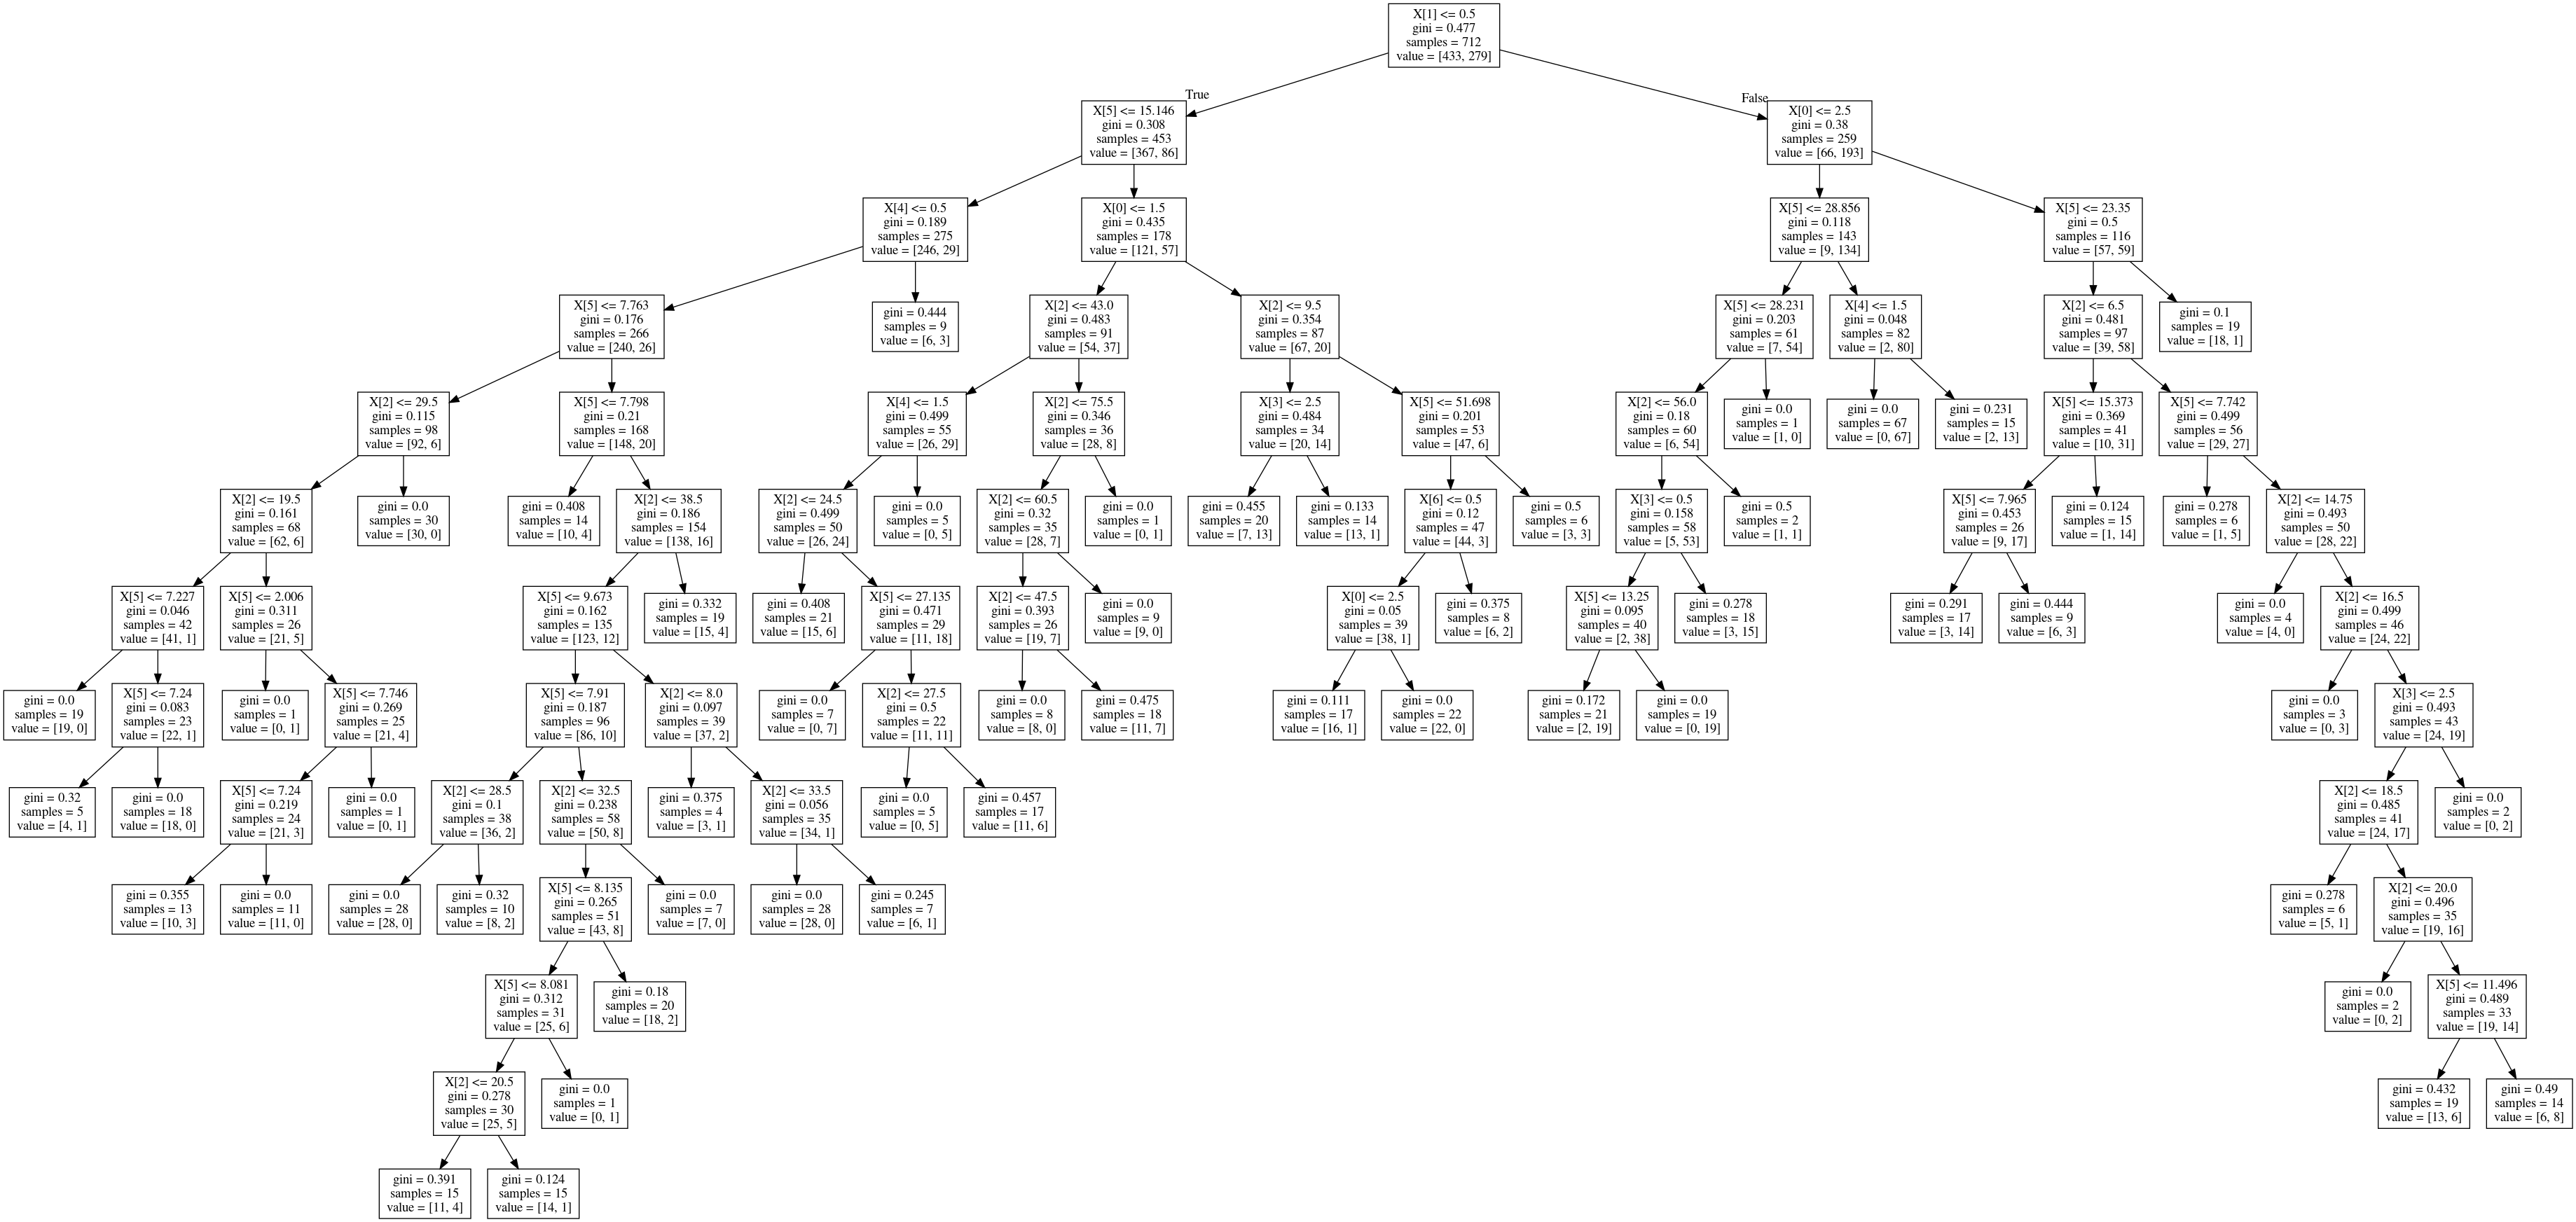

In [171]:
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())